In [7]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import sentiment_mod as s

In [23]:
#Consumer key,COnsumer Secret,access token and access secret

ckey="lygpCEW908Fbe5Gyb5dpsdAN8"
csecret="p0UiF7omL0L4tkwtJKUU9NN5Zb2Gf6kP8eUUWRlLp2KLHPuNOj"
atoken="550154362-qox0wz7bLFbdLINfybpbiLfcCkM2WPyF1KWxFwRP"
asecret="7PGjpbylqIw57XTQJkdnUVXv19RHU5J2471E4JbBQEjRE"

class listener(StreamListener):
    def on_data(self,data):
        all_data=json.loads(data)
    
        tweet=all_data["text"]
        sentiment_value,confidence=s.sentiment(tweet)
        print(tweet,sentiment_value,confidence)
        
        if confidence*100>=80:
            output=open("twitter-out.txt","a")
            output.write(sentiment_value)
            output.write('\n')
            output.close()
        return True
    def on_error(self,status):
        print(status)


In [28]:
auth=OAuthHandler(ckey,csecret)
auth.set_access_token(atoken,asecret)

twitterStream=Stream(auth,listener())
twitterStream.filter(track=['obama'])

RT @rising_serpent: George Soros' Open Society kept Eric Ciaramella and handful of Obama officials updated about Soros’s whereabouts, conte… neg 1.0
All your definitions on “We” is describing former president obama! 🙄 neg 1.0
@ashow0rld The past is prologue.  The @DNC  Shoved Obama down our throats in 07-08, shoved HRC down our throats in… https://t.co/MY9iftPxqt neg 1.0
RT @JuliansRum: Brennan didn’t seem to care about “sensitive technology” falling into foreign hands when Hillary’s server was spilling SAPs… neg 1.0
@StanbicBankZW 1. Enock Munhenga 
2. Tichafa Samuel Parirenyatwa 
3. 2nd Street 
4. Moving Forward 
5. Barack Husse… https://t.co/euGDNzUfxF neg 1.0
RT @paulsperry_: BREAKING: No fewer than 3 Senate committees are now formally investigating Obama-Biden solicitation of Ukrainian interfere… neg 1.0
RT @charliekirk11: The Washington Post published a story claiming Barack Obama is a 'Conservative'

Which makes sense considering they also… neg 1.0
@brianwhitman Serious question

RT @B52Malmet: Auntie Maxine knows what’s coming. https://t.co/iBQiAnK1Vt neg 1.0
RT @ananavarro: Racism:

Calling black athletes “sons of bitches”;
Not denouncing white nationalists;
Calling predominantly black countries… neg 1.0
@DrilEfdee @YC727USA @rsultzba It has been happening for years but Obama’s resistance movement put their lying and… https://t.co/TVsvWA6mcx neg 1.0
RT @IminHisbook: Perry's right. Daniel 2:21 "He removes kings &amp; raises up kings."  Nothing happens without God. Even bad leaders are picked… neg 1.0
RT @BrandonStraka: .@RudyGiuliani is so ****ing gangsta right now that I’m pretty much losing my mind for him. https://t.co/e86QickMnA neg 1.0
RT @BenKTallmadge: @TheLastRefuge2 Judge Ketanji Brown Jackson who ordered McGahn to comply with House subpoena was once interviewed as one… neg 1.0
RT @M2Madness: .@RudyGiuliani: "I'm also going to bring out a pay-for-play scheme in the Obama Administration that will be devastating to t… pos 0.8571428571428571
RT @Ikech_Ba

RT @Squill_whispers: Obama Tells Terror-Tied, Jew- Hating Congresswoman “I Am Proud Of You” https://t.co/Mh1g7R7rwI neg 1.0
RT @BrandonStraka: .@RudyGiuliani is so ****ing gangsta right now that I’m pretty much losing my mind for him. https://t.co/e86QickMnA neg 1.0
@lawyer4laws I resent Bill Mahar describing "Most Americans not watching. Just wants a thumbs up or down." Grrrrr….… https://t.co/pzaBSaarMA neg 1.0
RT @B52Malmet: Auntie Maxine knows what’s coming. https://t.co/iBQiAnK1Vt neg 1.0
RT @charliekirk11: Elizabeth Warren—Sends her kids to private school but doesn’t want you to

Kamala Harris—Owns a gun but doesn’t want you… neg 1.0
RT @RepMaxineWaters: Nunes is an unhinged liar! He knows he met with Shokin in Vienna. This sounds like the midnight visit to the White Hou… neg 1.0
RT @Newsweek: Tucker Carlson predicts Michelle Obama could be 2020 Dem nominee, says that's likely why Barack hasn't endorsed Biden https:/… neg 1.0
RT @Lrihendry: So, I guess everyone has forgotten about

KeyboardInterrupt: 

In [13]:
#Graphing sentiments live using Matplotlib


import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time

style.use("ggplot")

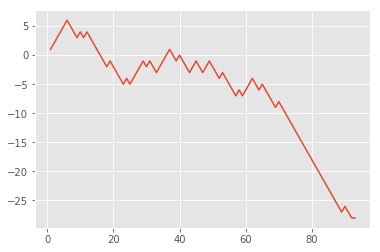

In [25]:
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)

def animate(i):
    pullData=open("twitter-out.txt","r").read()
    lines=pullData.split('\n')
    
    xar=[]
    yar=[]
    
    x=0
    y=0
    
    for l in lines:
        x+=1
        if 'pos' in l:
            y+=1
        elif 'neg' in l:
            y-=1
            
        xar.append(x)
        yar.append(y)
    
    ax1.clear()
    ax1.plot(xar,yar)
ani=animation.FuncAnimation(fig,animate,interval=1000)
plt.show()